In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Im Folgenden betrachten wir die Prädiktion eines Zustandes. Dazu soll aus eine Positionsmessungen eine Geschwindigkeit und eine Position prädiziert werden.

Gegeben sei initialer Schätzwert $\hat{\mathbf{x}}_0$ für $k=0$ mit Kovarianzmatrix $C_0^{\mathbf{x}}$

Zustandsraum constant velocity model mit Annahme von additiven weißem Rauschen:
\begin{align} p_k&=p_{k-1}+T\cdot s_{v-1}+n_{k-1}^p\\
    v_k&=v_{k-1}+n_{k-1}^v 
\end{align}

Überführt in Matrixdarstellung mit Zustand $\mathbf{x}_k=\begin{pmatrix}p_k\\v_k \end{pmatrix}$

$$\mathbf{x}_{k}=\begin{pmatrix}p_k\\v_k \end{pmatrix}=\begin{pmatrix}1 & T\\0 &1 \end{pmatrix}\cdot \begin{pmatrix}p_{k-1}\\v_{k-1} \end{pmatrix} +\begin{pmatrix}w_{k-1}^p\\w_{k-1}^v\end{pmatrix}=\mathbf{A}\cdot\mathbf{x}_{k-1}+\mathbf{n}_{k-1}$$

# Aus aktueller Schätzung kann mit Forderung der erwartungstreue die Schätzung durch Prädiktion für $k+1$ berechnet werden:
$$\hat{\mathbf{x}}_{k+1}=\mathbb{E}(\mathbf{x}_{k+1})=\mathbb{E}(\mathbf{A}\cdot\mathbf{x}_{k}+\mathbf{n}_{k-1})=\mathbf{A}\cdot\mathbb{E}(\mathbf{x}_{k}) +\mathbf{0} =\mathbf{A}\cdot\hat{\mathbf{x}}_{k}$$

Da jedoch keine neue Messung zur Verfügung steht wird sich die Kovarianz der Schätzung verschlechtern, sie kann wie folgt berechent werden:
$$\mathbf{C}^{\mathbf{x}}_{k+1}=\mathbb{E}((\mathbf{x}_{k+1}-\hat{\mathbf{x}}_{k+1})\cdot(\mathbf{x}_{k+1}-\hat{\mathbf{x}}_{k+1})^{\top})=\mathbf{A}\cdot\mathbb{E}((\mathbf{x}_{k}-\hat{\mathbf{x}}_{k})\cdot(\mathbf{x}_{k}-\hat{\mathbf{x}}_{k})^{\top})\cdot \mathbf{A}^{\top} =\mathbf{A}\cdot \mathbf{C}^{\mathbf{x}}_{k}\cdot \mathbf{A}^{\top} $$

Wir betrachten wie sich die Prädiktion von einem Zeitschritt zum nächsten Verhält. Zeitschritte sind äquidistant mit $T=0.1\text{s}$ verteilt. Im Ausgangszustand bewegt sich das Objekt mit $v_0=10\frac{\text{m}}{\text{s}}$ und befindet sich in $p_0=0\text{m}$

In [2]:
k=10

In [3]:
A = np.array([[1, 1], [0, 1]])
x_0 = np.array([0, 10])
C_0 = np.array([[1, 0], [0, 1]])

current_estimate = []
current_estimate.append(x_0)
current_cov = []
current_cov.append(C_0)

current_pdf = []
current_pdf.append(multivariate_normal(current_estimate[0], current_cov[0]))
for i in range(k):
    current_estimate.append(A@current_estimate[i])
    current_cov.append(A@current_cov[i]@A.transpose())
    current_pdf.append(multivariate_normal(
        current_estimate[i+1], current_cov[i+1]))


# jetzt einschrittberechnungen + plots


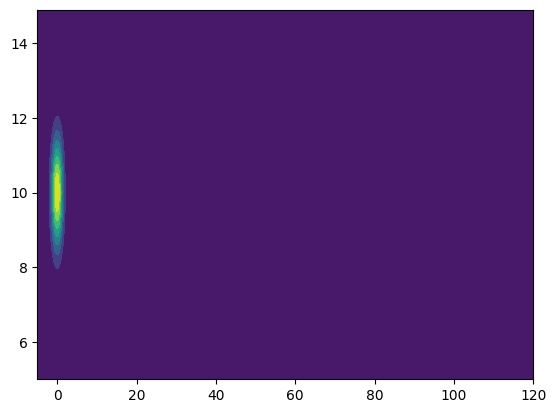

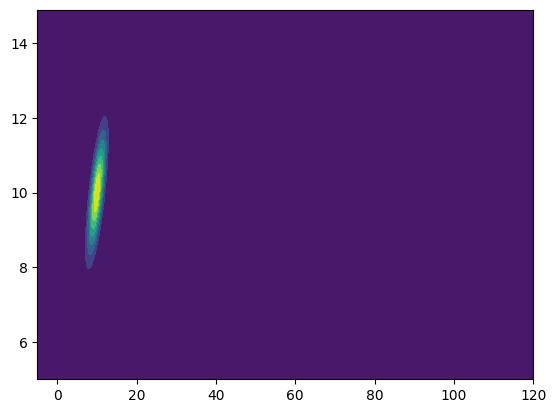

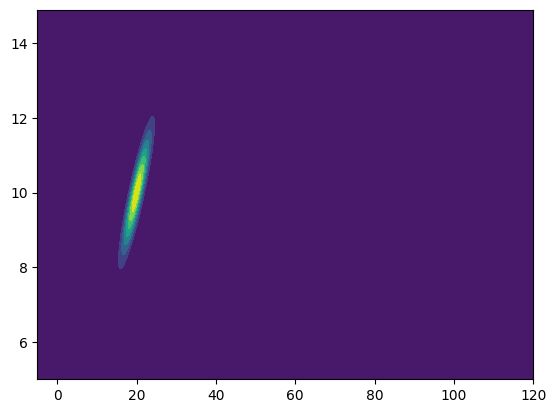

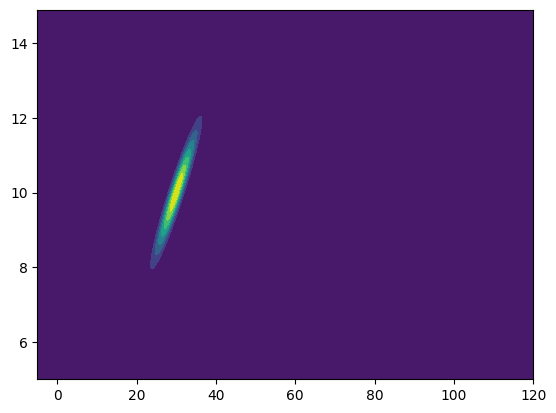

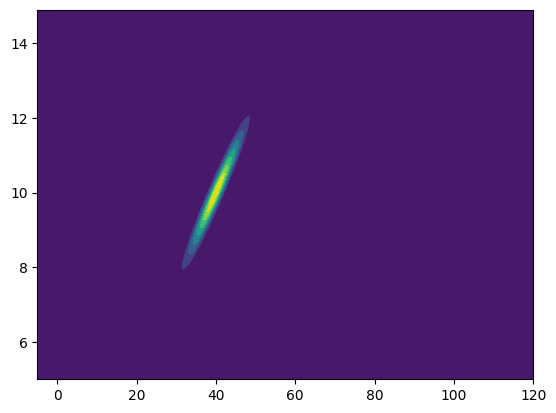

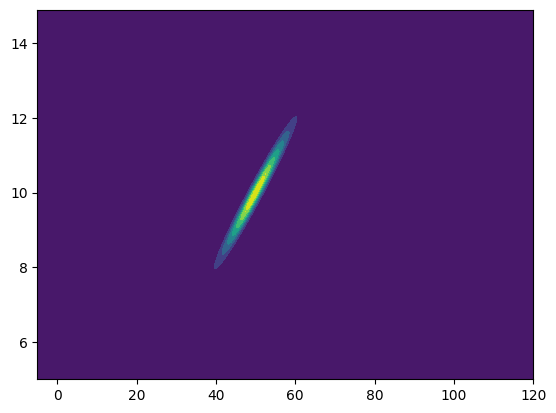

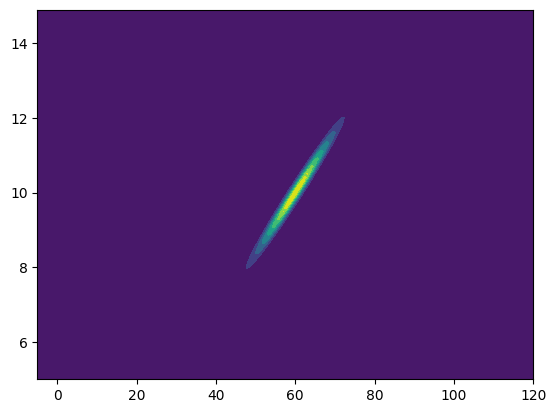

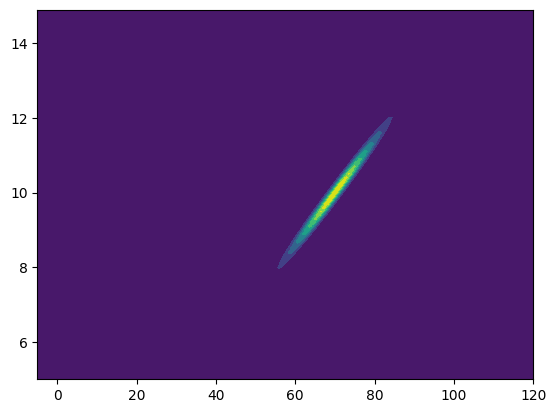

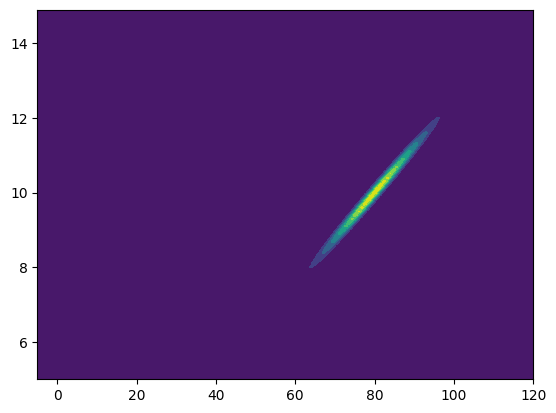

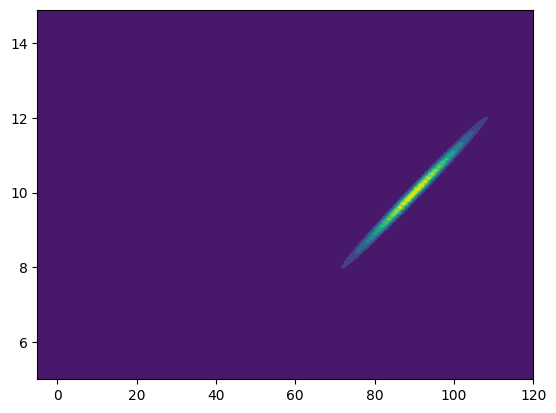

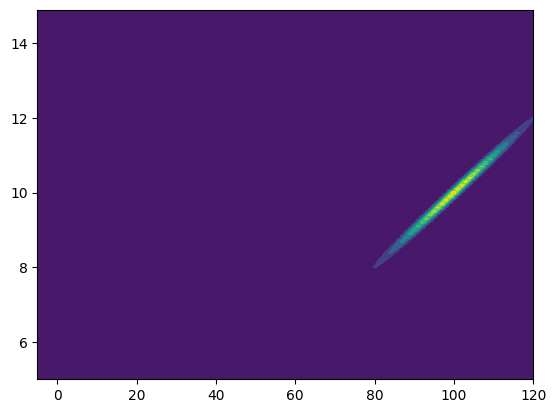

In [4]:

# x, y = np.mgrid[current_estimate[k][0]-1*current_cov[k][0, 0]:current_estimate[k][0]+1*current_cov[k][0,0]:0.1, current_estimate[k][1]-1*current_cov[k][1, 1]:current_estimate[k][1]+1*current_cov[k][1, 1]:0.1]
x, y = np.mgrid[-5:120:0.1,5:15:0.1]

for i in range(k+1):
    pos = np.dstack((x, y))
    plt.contourf(x, y, current_pdf[i].pdf(pos))
    plt.xlim(-5, 120)
    plt.show()


In [5]:
for i in range(k+1):
    print("i:",i,"\n",np.linalg.eigvals(current_cov[i]))

i: 0 
 [1. 1.]
i: 1 
 [2.61803399 0.38196601]
i: 2 
 [5.82842712 0.17157288]
i: 3 
 [10.90832691  0.09167309]
i: 4 
 [17.94427191  0.05572809]
i: 5 
 [26.96291202  0.03708798]
i: 6 
 [3.7973666e+01 2.6334039e-02]
i: 7 
 [5.09803846e+01 1.96153875e-02]
i: 8 
 [6.59848450e+01 1.51549951e-02]
i: 9 
 [8.29879501e+01 1.20499422e-02]
i: 10 
 [1.01990195e+02 9.80486407e-03]
